In [ ]:
# Import Libraries
from scipy import misc
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import logging
tf.get_logger().setLevel(logging.ERROR)
import random
import matplotlib.pyplot as plt
import matplotlib as mp
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import imageio
import ssl
import os, sys
from PIL import Image
import glob
ssl._create_default_https_context = ssl._create_unverified_context


In [ ]:
print(tf.__version__)

2.7.0


In [ ]:
path = './Free/'

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    path,
    labels = 'inferred',
    label_mode = 'binary',
    class_names = ['0', '1'],
    color_mode = 'grayscale',
    batch_size = 32,
    image_size = (28,28),
    shuffle = True,
    seed = 1337,
    validation_split = 0.1,
    subset = 'training')

Found 1924 files belonging to 2 classes.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    path,
    labels = 'inferred',
    label_mode = 'binary',
    class_names = ['0', '1'],
    color_mode = 'grayscale',
    batch_size = 32, image_size = (28,28),
    shuffle = True, seed = 1337, validation_split = 0.1,
    subset = 'validation')

Found 1924 files belonging to 2 classes.


In [ ]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    path, labels = 'inferred',
    label_mode = 'binary',
    class_names = ['0', '1'],
    color_mode = 'grayscale',
    batch_size = 32,
    image_size = (28,28),
    shuffle = True,
    seed = 1337,
    validation_split = 0.1,
    subset = 'validation')

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 28, 28, 1)
(32, 1)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [ ]:
from keras.models import Sequential
num_classes = 2

model = Sequential([
  layers.Rescaling(1./255, input_shape=(28, 28, 1)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer = 'adam',
              loss=  tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 28, 28, 1)         0         
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 7, 7, 64)         

In [ ]:
# Apply Early Stopping
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

# Fit the final model
epochs = 50
history = model.fit(train_ds, validation_data = val_ds, epochs = epochs, callbacks = [callback])

Epoch 1/50
49/49 [==============================] - 0s 10ms/step - loss: 0.5635 - accuracy: 0.7474 - val_loss: 0.5501 - val_accuracy: 0.7604
Epoch 2/50
49/49 [==============================] - 1s 10ms/step - loss: 0.5652 - accuracy: 0.7474 - val_loss: 0.5476 - val_accuracy: 0.7604
Epoch 3/50
49/49 [==============================] - 0s 10ms/step - loss: 0.5633 - accuracy: 0.7474 - val_loss: 0.5678 - val_accuracy: 0.7604
Epoch 4/50
49/49 [==============================] - 0s 9ms/step - loss: 0.5637 - accuracy: 0.7474 - val_loss: 0.5390 - val_accuracy: 0.7604
Epoch 5/50
49/49 [==============================] - 0s 10ms/step - loss: 0.5390 - accuracy: 0.7474 - val_loss: 0.5202 - val_accuracy: 0.7604
Epoch 6/50
49/49 [==============================] - 0s 9ms/step - loss: 0.4618 - accuracy: 0.7740 - val_loss: 0.4555 - val_accuracy: 0.8385
Epoch 7/50
49/49 [==============================] - 1s 12ms/step - loss: 0.3478 - accuracy: 0.8636 - val_loss: 0.4615 - val_accuracy: 0.7865
Epoch 8/50
49/4

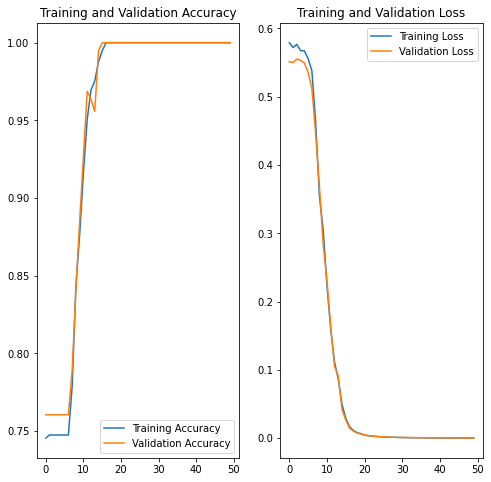

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()